# DSC 441 Assignment 3

## Name : Jonathan Sands
## Date: 10/22/2020

In [1]:
#Operation and data manipulation modules
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

#Machine Learning modules
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import mean_squared_log_error

#Visualization
import matplotlib.pyplot as plt

In [3]:
#Retrieve data from it's storage location on my computer
data = pd.read_csv(r'D:\DePaul\DSC 441\sledata.txt', sep = " ", header = None)

#Assign numeric column names
data.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

<bound method NDFrame.head of      0  1  2  3  4  5  6  7  8  9  10  11
0    0  0  0  0  0  0  0  0  0  0   0   1
1    0  0  0  0  1  0  0  0  0  0   1   1
2    0  0  0  0  1  0  0  0  0  0   0   1
3    0  0  0  1  0  0  0  0  0  0   0   1
4    0  0  0  0  1  0  0  0  1  0   1   1
..  .. .. .. .. .. .. .. .. .. ..  ..  ..
295  1  0  0  0  1  0  0  0  1  1   1   2
296  1  0  1  1  0  0  0  0  1  1   1   2
297  0  0  0  1  1  1  0  0  0  1   1   2
298  1  0  1  0  1  1  1  1  0  1   1   2
299  1  0  1  1  1  1  0  1  1  1   1   2

[300 rows x 12 columns]>

In [3]:
#Split the data to an 80/20 train test split seperation
trainData, testData = model_selection.train_test_split(data, train_size = 0.8, random_state = 0)

#separate desired columns for train data
xTrain = trainData.iloc[:,:-1]
yTrain = trainData.iloc[:,-1:]

In [4]:
#separate desired columns for the test data
yTest = testData.iloc[:,-1:]
xTest = testData.iloc[:,:-1]

[Text(941.625, 1261.9285714285713, '9 <= 0.5\ngini = 0.5\nsamples = 240\nvalue = [121, 119]'),
 Text(627.75, 1067.7857142857142, '0 <= 0.5\ngini = 0.182\nsamples = 128\nvalue = [115, 13]'),
 Text(348.75, 873.6428571428571, '6 <= 0.5\ngini = 0.097\nsamples = 118\nvalue = [112, 6]'),
 Text(139.5, 679.5, '8 <= 0.5\ngini = 0.037\nsamples = 106\nvalue = [104, 2]'),
 Text(69.75, 485.3571428571429, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(209.25, 485.3571428571429, '4 <= 0.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(139.5, 291.2142857142858, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(279.0, 291.2142857142858, '10 <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(209.25, 97.07142857142867, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(348.75, 97.07142857142867, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(558.0, 679.5, '8 <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(488.25, 485.3571428571429, '2 <= 0.5\ngini = 0.198\nsamples = 9\

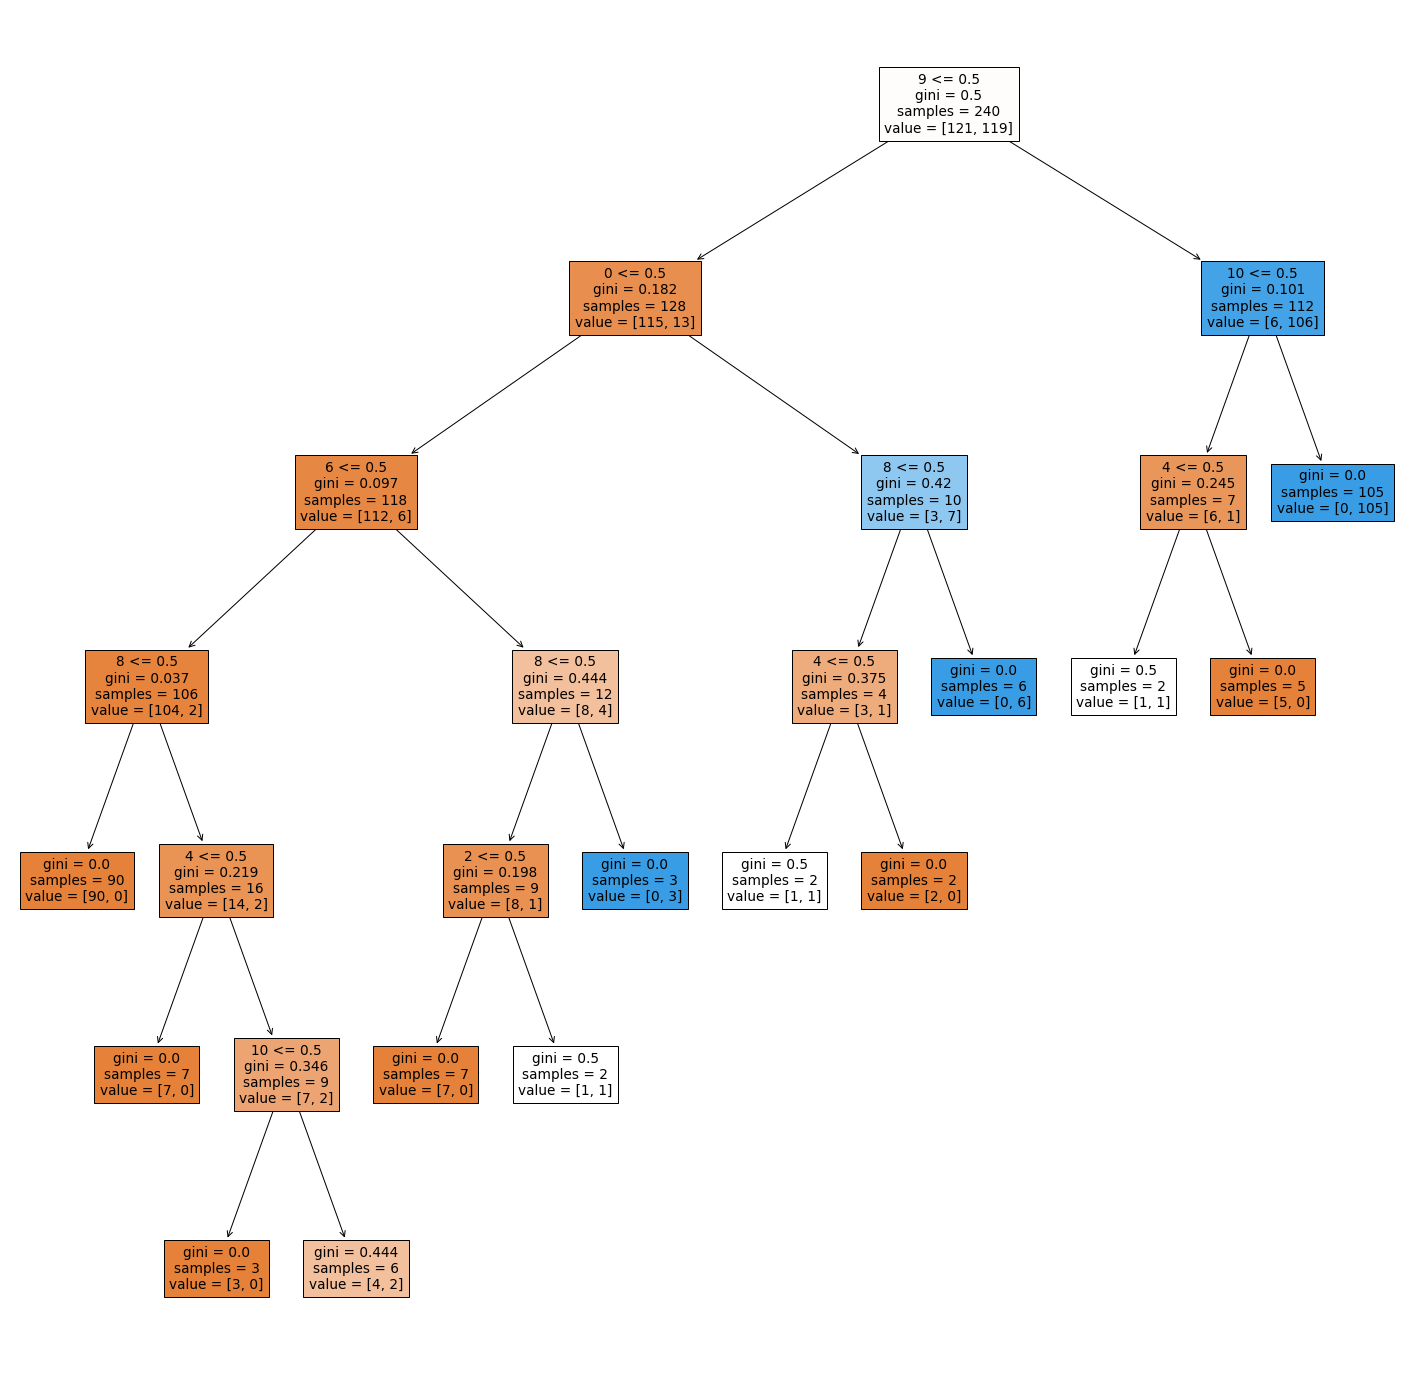

In [5]:
#Create the decision tree
clf = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split = 2, min_samples_leaf = 2, min_impurity_decrease = .001, random_state = 0)

clf = clf.fit(xTrain, yTrain)

fig = plt.figure(figsize = (25, 25))
tree.plot_tree(clf, feature_names = xTrain.columns, filled = True)

In [165]:
prediction = clf.predict(xTest)


#Finding the R Score 
print('The R squared score is :  {} \n\nThis tells us that the model fits our data well'.format(clf.score(xTest, yTest)))

print('\n\nOur error for this classifier was {}%'.format(mean_squared_log_error(yTest, prediction)*100))

print('\nThe total nodes for the tree are {}'.format(clf.tree_.node_count))

importance = clf.feature_importances_
print('\n')
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

The R squared score is :  0.9333333333333333 

This tells us that the model fits our data well


Our error for this classifier was 1.096013025954437%

The total nodes for the tree are 25


Feature: 0, Score: 0.06796
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00680
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01402
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01865
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.05843
Feature: 9, Score: 0.74590
Feature: 10, Score: 0.08823


## Problem 1

##### Above is the plot I created for the decision tree.

#### 1.)

The criterion used to measure the quality of the split in this classifier is the Gini impurity measure. This is the default, but the other supported type is entropy for information gain.

The minimum number of samples required to create a leaf are set to 2, this proved to give us the largest possible $ R^2 $ value along with the smallest error.

Their is no depth restriction for the tree, meaning that the nodes expand until all leaves are pure or until all leaves contain less than the minimum sample set, which is 2.

The error testing with the mean_squared_log_error() was just over 1%. 

#### 2.)

There are 13 leaves which in addition to the other nodes help make up the 29 total nodes

#### 3.)

The three most important features for making predictions are 9, 10, and 0 based on using the CART algorithm for feature importance and using the GINI as the criterion for splits.

The Gini equation is:

$ Gini = 1 - \sum_{n=1}^{n}p_j^2$

$Gini_s = \sum_{i = 1}^{k} \frac{n_i}{n}Gini(i)$

#### 4.)

As we continue to increase the min_sample_split, the number of nodes decreases, decreasing it's complexity. Our error and accuracy also increase gradually as we increase the minimum sample split.

***
###### Personal Notes
The R-Score tells us that there our model fits the data well using the $ R^2 $ score as a measurement.
The $ R^2 $ Score divides the  residual SumSquaredRegression (SSR) by the total sumn of square (SST):


$ R^2 = \dfrac{RSS}{TSS} $


$RSS = \sum_{i = 1}^{n}R_n - R $


$TSS = \sum_{i = 1}^{n}T_n - T $


Where $ R_n $ is the residual of sample $ n $. Similarly, $ T_n $ is the difference in a sample $ n $'s summable observations and the mean summable observations overall.
***



Sklearn uses the Gini Index to compute importance and does it for us automatically at each node using:

$ Gini = 1 - \sum_{n=1}^{n}p_j^2$

$Gini_s = \sum_{i = 1}^{k} \frac{n_i}{n}Gini(i)$

where $P_j $ is the probability of a tuple $ j $ belonging to a specific class.


## Problem 2 (30 points)
#### This problem illustrates the effect of the class imbalance of the accuracy of the decision
trees. Download the red wine quality data from the UCI machine learning repository at:
http://archive.ics.uci.edu/ml/datasets/Wine+Quality

###### 1.)

In [180]:
#Collect Data 
data = pd.read_csv(r'C:\Users\Jonathan Sands\Downloads\winequality-red.csv', sep = ";")
print('There are 6 classes, those 6 classes are: {}'.format(data.quality.unique()))
data.head()

There are 6 classes, those 6 classes are: [5 6 7 4 8 3]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

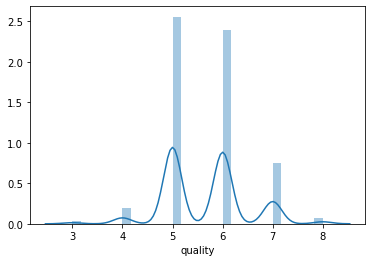

In [181]:
sns.distplot(data.quality)

Clearly the code is heavily normally distributed. Majority of the datapoints are in the 5 and 6 range.

###### 2.)

In [168]:
#Building the classifier
Train, Test = model_selection.train_test_split(data, train_size = 0.8, random_state = 0)

xTrain = Train.iloc[:,:-1]
yTrain = Train.iloc[:,-1:]

xTest = Test.iloc[:,:-1]
yTest = Test.iloc[:,-1:]

In [191]:
for i in xTrain.columns:
    
    xTrain[i] = stats.zscore(xTrain[i])

for i in xTest.columns:
    
    xTest[i] = stats.zscore(xTest[i])


In [222]:
clf = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 50, min_samples_leaf = 2, random_state = 0)

clf = clf.fit(xTrain, yTrain)

fig = plt.figure(figsize = (200, 200));
tree.plot_tree(clf, feature_names = xTrain.columns, filled = True);


In [224]:
prediction = clf.predict(xTest)
print('Our error for this classifier was {}%'.format(mean_squared_log_error(yTest, prediction)*100))

print('\nThe R squared score is :  {} \n\nThis tells us that the model fits our data well'.format(clf.score(xTest, yTest)))

print('\nThe total nodes for the tree are {}'.format(clf.tree_.node_count))

importance = clf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Our error for this classifier was 1.2621260905609717%

The R squared score is :  0.615625 

This tells us that the model fits our data well

The total nodes for the tree are 93
Feature: 0, Score: 0.01438
Feature: 1, Score: 0.14363
Feature: 2, Score: 0.02820
Feature: 3, Score: 0.05008
Feature: 4, Score: 0.04402
Feature: 5, Score: 0.02374
Feature: 6, Score: 0.09349
Feature: 7, Score: 0.02999
Feature: 8, Score: 0.07563
Feature: 9, Score: 0.16045
Feature: 10, Score: 0.33641


### Problem 1 Questions for Problem 2
###### 1.) 

After playing around with it for a bit, I found that having a max depth of 10, with the minimum number of samples to cause a split = 50 and the minimum number of samples to make a node to be 2 gave me the most accurate predicitons and the best fitted model.

###### 2.)

There are 93 nodes for the tree, and I believe 48 leaves, this may be incorrect as I hand counted the leaves but it appears to be about right. I feel as though there may be some overfitting as a result of this but the predictions are better with a larger amount of leaves. If we had more data this would be a thing I would test using a CV set.

###### 3.)

The best features appear to be alcohol, sulphates, and volatile acidity. I got these results once again by using the CART algorithm for feature importance and using the GINI as the criterion for splits.

The Gini equation is:

$ Gini = 1 - \sum_{n=1}^{n}p_j^2$

$Gini_s = \sum_{i = 1}^{k} \frac{n_i}{n}Gini(i)$

A few others such as sulfer dioxide have some good moments in the tree in regards to their GINI, but too many bad to outweigh the true starts listed above.

###### 4.)

This tree in it's most complex form is the best. When the number of samples in a node are set to the smallest min, it returns the most accurate fit. This may be caused by overfitting but since it also predicts the test data set the best I will leave it.

In [3]:
#Reload the data to bin
data = pd.read_csv(r'C:\Users\Jonathan Sands\Downloads\winequality-red.csv', sep = ";")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
#Find the average to do mean bins
LOW = []

FAIR = []

GOOD = []

HIGH = []

for i in range(len(data.quality)):
    
    if data.quality[i] <= 4:
        
        LOW.append(data.quality[i])
        
    elif data.quality[i] == 5:
        
        FAIR.append(data.quality[i])
        
    elif data.quality[i] == 6:
        
        GOOD.append(data.quality[i])
        
    elif data.quality[i] >= 7:
        
        HIGH.append(data.quality[i])
        

mean_LOW = sum(LOW)/len(LOW)

mean_FAIR = sum(FAIR)/len(FAIR)

mean_GOOD = sum(GOOD)/len(GOOD)

mean_HIGH = sum(HIGH)/len(HIGH)

In [8]:
#Create the bins
for i in range(len(data.quality)):
    
    if data.quality[i] <= 4:
        
        data.quality[i] = mean_LOW
        
    elif data.quality[i] == 5:
        
        data.quality[i] = mean_FAIR
        
    elif data.quality[i] == 6:
        
        data.quality[i] = mean_GOOD
        
    elif data.quality[i] >= 7:
        
        data.quality[i] = mean_HIGH

<ipython-input-8-77bfe0e6a103>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.quality[i] = mean_FAIR
<ipython-input-8-77bfe0e6a103>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.quality[i] = mean_GOOD
<ipython-input-8-77bfe0e6a103>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.quality[i] = mean_HIGH
<ipython-input-8-77bfe0e6a103>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [9]:
#Building the classifier
Train, Test = model_selection.train_test_split(data, train_size = 0.8, random_state = 0)

xTrain = Train.iloc[:,:-1]
yTrain = Train.iloc[:,-1:]

xTest = Test.iloc[:,:-1]
yTest = Test.iloc[:,-1:]

In [10]:
clf = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 50, min_samples_leaf = 2, random_state = 0)

clf = clf.fit(xTrain, yTrain)

fig = plt.figure(figsize = (200,200))
tree.plot_tree(clf, feature_names = xTrain.columns, filled = True);


In [11]:
prediction = clf.predict(xTest)
print('Our error for this classifier was {}%'.format(mean_squared_log_error(yTest, prediction)*100))

print('\nThe R squared score is :  {} \n\nThis tells us that the model fits our data well'.format(clf.score(xTest, yTest)))

print('\nThe total nodes for the tree are {}'.format(clf.tree_.node_count))

importance = clf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Our error for this classifier was 1.935257704435272%

The R squared score is :  0.58125 

This tells us that the model fits our data well

The total nodes for the tree are 107
Feature: 0, Score: 0.01250
Feature: 1, Score: 0.11708
Feature: 2, Score: 0.02022
Feature: 3, Score: 0.02980
Feature: 4, Score: 0.04575
Feature: 5, Score: 0.03355
Feature: 6, Score: 0.11766
Feature: 7, Score: 0.06274
Feature: 8, Score: 0.02497
Feature: 9, Score: 0.18590
Feature: 10, Score: 0.34984


### Problem 1 Questions for binning

###### 1.)

I set the minimum number of samples required for a node to be a leaf to 2, the min required for a split to 50 and the max depth to 10 because it led the data to match the model better and minimized the error to 3% 

###### 2.)

There are 29 terminal nodes which add with the other nodes to create 59 total nodes.

###### 3.)

Alcohol (Feature 0: 0.10), sulphates (Feature 1: 0.17219), and total sulfur dioxide (Feature 6: 0.09946) appear to be the strongest features this time using the CART algorithm. Volatile acidity (Feature 1: 0.09544) is important, just slightly less than the others.

Sulfer dioxides and pH also appear to be a valuable feature.

###### 4.)

Complexity definitely decreases as the minimum split is increased because there are more samples allowed in terminal nodes.

### Problem 2 

###### Question 4

Binning makes the classes more balanced. It can improve the performance of the model and/or it can decrease the complexity of the model in terms of the number of nodes. In the case above the complexity of the model decreased while the accuracy is the same.

###### Question 5

If we began using cost sensitive approaches in order to avoid the loss of info through binning. If we did this we could potentially get better results in terms of lower and higher scores than binning provides. Over and undersampling the majority classes would also help.

Personally I would like to continue but just receive more data. I don't want to sacrifice any of my train or test data for cross validation, even though I know there are methods for a "take and replace" approach.

### Problem 3

| Example | Color| Height | Width | Class|
| --- | --- | --- | --- | --- | 
| A | Red | Short | Thin | No | 
| B | Blue | Tall | Fat | Yes |
| C | Green | Short | Fat | No |
| D | Green | Tall | Thin | Yes|
| E | Blue | Short | Thin | No |


For the first example A, we check to see the color. Because the color is Red it's an automatic No

For the second example B, we check to see the color Blue, then we check width fat and we get Yes

For the third example C, we check to see the color Green, height in short so it's a No

For the fourth example D, we check to see the color Green, height is tall so it's a Yes

For the last example E, we check to see the color is Blue, width is thin so it's a No

